In [20]:
import sys
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import patsy as pt
import pymc3 as pm

plt.rcParams['figure.figsize'] = 14, 6
np.random.seed(0)
print('Running on PyMC3 v{}'.format(pm.__version__))
import os
import ast
import arviz as az
import arviz as az
import theano.tensor as tt
import pickle

Running on PyMC3 v3.8


In [2]:
# Define repositories and filenames 
figures_dir = './figures'
noncovid_data_dir = './data/non_covid_data'

# Alexandria: filenames
alexandria_dir = os.path.join(noncovid_data_dir, 'Alexandria')
demographic_alexandria_filename = os.path.join(alexandria_dir, 'demographic_number_info_alexandria_covid.csv')
economic_alexandria_filename = os.path.join(alexandria_dir, 'economic_number_info_alexandria_covid.csv')
housing_alexandria_filename = os.path.join(alexandria_dir, 'housing_number_info_alexandria_covid.csv')
social_alexandria_filename = os.path.join(alexandria_dir, 'social_number_info_alexandria_covid.csv')
percent_demographic_alexandria_filename = os.path.join(alexandria_dir, 'demographic_percent_info_alexandria_covid.csv')
percent_economic_alexandria_filename = os.path.join(alexandria_dir, 'economic_percent_info_alexandria_covid.csv')
percent_housing_alexandria_filename = os.path.join(alexandria_dir, 'housing_percent_info_alexandria_covid.csv')
percent_social_alexandria_filename = os.path.join(alexandria_dir, 'social_percent_info_alexandria_covid.csv')

# st_louis: filenames
st_louis_dir = os.path.join(noncovid_data_dir, 'StLouis')
demographic_st_louis_filename = os.path.join(st_louis_dir, 'demographic_number_info_st_louis_covid.csv')
economic_st_louis_filename = os.path.join(st_louis_dir, 'economic_number_info_st_louis_covid.csv')
housing_st_louis_filename = os.path.join(st_louis_dir, 'housing_number_info_st_louis_covid.csv')
social_st_louis_filename = os.path.join(st_louis_dir, 'social_number_info_st_louis_covid.csv')
percent_demographic_st_louis_filename = os.path.join(st_louis_dir, 'demographic_percent_info_st_louis_covid.csv')
percent_economic_st_louis_filename = os.path.join(st_louis_dir, 'economic_percent_info_st_louis_covid.csv')
percent_housing_st_louis_filename = os.path.join(st_louis_dir, 'housing_percent_info_st_louis_covid.csv')
percent_social_st_louis_filename = os.path.join(st_louis_dir, 'social_percent_info_st_louis_covid.csv')

# chicago: filenames
chicago_covid_filename = './data/covid_data/processed/chicago_covid.csv'
chicago_dir = os.path.join(noncovid_data_dir, 'Chicago')
demographic_chicago_filename = os.path.join(chicago_dir, 'demographic_number_info_CHICAGO.csv')
economic_chicago_filename = os.path.join(chicago_dir, 'economic_number_info_CHICAGO.csv')
housing_chicago_filename = os.path.join(chicago_dir, 'housing_number_info_CHICAGO.csv')
social_chicago_filename = os.path.join(chicago_dir, 'social_number_info_CHICAGO.csv')
percent_demographic_chicago_filename = os.path.join(chicago_dir, 'demographic_percent_info_CHICAGO.csv')
percent_economic_chicago_filename = os.path.join(chicago_dir, 'economic_percent_info_CHICAGO.csv')
percent_housing_chicago_filename = os.path.join(chicago_dir, 'housing_percent_info_CHICAGO.csv')
percent_social_chicago_filename = os.path.join(chicago_dir, 'social_percent_info_CHICAGO.csv')

# houston: filenames
houston_dir = os.path.join(noncovid_data_dir, 'Houston')
demographic_houston_filename = os.path.join(houston_dir, 'demographic_number_info_houston_covid.csv')
economic_houston_filename = os.path.join(houston_dir, 'economic_number_info_houston_covid.csv')
housing_houston_filename = os.path.join(houston_dir, 'housing_number_info_houston_covid.csv')
social_houston_filename = os.path.join(houston_dir, 'social_number_info_houston_covid.csv')
percent_demographic_houston_filename = os.path.join(houston_dir, 'demographic_percent_info_houston_covid.csv')
percent_economic_houston_filename = os.path.join(houston_dir, 'economic_percent_info_houston_covid.csv')
percent_housing_houston_filename = os.path.join(houston_dir, 'housing_percent_info_houston_covid.csv')
percent_social_houston_filename = os.path.join(houston_dir, 'social_percent_info_houston_covid.csv')

# NY: filenames
NY_covid_filename = './data/covid_data/processed/NY_covid.csv'
NY_dir = os.path.join(noncovid_data_dir, 'NY')
demographic_NY_filename = os.path.join(NY_dir, 'demographic_number_info_NY.csv')
economic_NY_filename = os.path.join(NY_dir, 'economic_number_info_NY.csv')
housing_NY_filename = os.path.join(NY_dir, 'housing_number_info_NY.csv')
social_NY_filename = os.path.join(NY_dir, 'social_number_info_NY.csv')
percent_demographic_NY_filename = os.path.join(NY_dir, 'demographic_percent_info_NY.csv')
percent_economic_NY_filename = os.path.join(NY_dir, 'economic_percent_info_NY.csv')
percent_housing_NY_filename = os.path.join(NY_dir, 'housing_percent_info_NY.csv')
percent_social_NY_filename = os.path.join(NY_dir, 'social_percent_info_NY.csv')


All data was updated on May 31, 2020 so it is reflective of the numbers that were published by that date. 


In [3]:
## Load data

# Alexandria 

alexandria_df = pd.read_csv(demographic_alexandria_filename)[['zipcode','covid_cases','D1. AGE.Total population']]
percent_demographic_alexandria_df = pd.read_csv(percent_demographic_alexandria_filename)
economic_alexandria_df = pd.read_csv(economic_alexandria_filename)
percent_housing_alexandria_df = pd.read_csv(percent_housing_alexandria_filename)
social_alexandria_df = pd.read_csv(social_alexandria_filename)

# St Louis

st_louis_df = pd.read_csv(demographic_st_louis_filename)[['zipcode','covid_cases','D1. AGE.Total population']]
percent_demographic_st_louis_df = pd.read_csv(percent_demographic_st_louis_filename)
economic_st_louis_df = pd.read_csv(economic_st_louis_filename)
percent_housing_st_louis_df = pd.read_csv(percent_housing_st_louis_filename)
social_st_louis_df = pd.read_csv(social_st_louis_filename)

# Chicago
chicago_df = pd.read_csv(demographic_chicago_filename)[['zipcode','D1. AGE.Total population']]
covid_chicago_df = pd.read_csv(chicago_covid_filename)[['zcta','covid_cases']]
covid_chicago_df.rename({'zcta': 'zipcode'}, inplace=True, axis=1)
percent_demographic_chicago_df = pd.read_csv(percent_demographic_chicago_filename)
economic_chicago_df = pd.read_csv(economic_chicago_filename)
percent_housing_chicago_df = pd.read_csv(percent_housing_chicago_filename)
social_chicago_df = pd.read_csv(social_chicago_filename)

# Houston
houston_df = pd.read_csv(demographic_houston_filename)[['zipcode','covid_cases','D1. AGE.Total population']]
percent_demographic_houston_df = pd.read_csv(percent_demographic_houston_filename)
economic_houston_df = pd.read_csv(economic_houston_filename)
percent_housing_houston_df = pd.read_csv(percent_housing_houston_filename)
social_houston_df = pd.read_csv(social_houston_filename)

# NY 
NY_df = pd.read_csv(demographic_NY_filename)[['zipcode','D1. AGE.Total population']]
covid_NY_df = pd.read_csv(NY_covid_filename)[['zcta','covid_cases']]
covid_NY_df.rename({'zcta': 'zipcode'}, inplace=True, axis=1)
percent_demographic_NY_df = pd.read_csv(percent_demographic_NY_filename)
economic_NY_df = pd.read_csv(economic_NY_filename)
percent_housing_NY_df = pd.read_csv(percent_housing_NY_filename)
social_NY_df = pd.read_csv(social_NY_filename)

In [4]:
NY_df = pd.merge(NY_df, covid_NY_df, how='inner',on='zipcode')
chicago_df = pd.merge(chicago_df, covid_chicago_df, how='inner',on='zipcode')

In [5]:
def merge_dataframes(df, social_df, demographic_df, economic_df, city_name):
    
    df  = pd.merge(df, social_df[['zipcode','S1. HOUSEHOLDS BY TYPE.Average household size']], \
                      on='zipcode', how='inner')
    df = pd.merge(df, demographic_df[['zipcode','D3. RACE.White alone']], on='zipcode',how='inner')
    df = pd.merge(df, economic_df[['zipcode','E1. HOUSEHOLD INCOME AND BENEFITS.Median household income']])
    df['proportion minority'] = (100 - df['D3. RACE.White alone'].astype(float))/100
    df.rename({'S1. HOUSEHOLDS BY TYPE.Average household size': 'avg household size'},axis=1,inplace=True)
    df['avg household size'] = df['avg household size'].apply(lambda x: float(x) if x!='-' else np.nan)
    df['population'] = df['D1. AGE.Total population'].apply(lambda x: int("".join(x.split(','))) if x!='-' else np.nan)
    df['covid rate'] = df['covid_cases']/df['population']
    df['median income'] = df['E1. HOUSEHOLD INCOME AND BENEFITS.Median household income'].apply(lambda x: \
                                        int("".join(x[1:].split(',')))if x!='-' else np.nan)
    df.drop(['D1. AGE.Total population','D3. RACE.White alone',\
            'E1. HOUSEHOLD INCOME AND BENEFITS.Median household income'],axis=1,inplace=True)
    
    df['city'] = city_name
    df.dropna(inplace=True)
    
    return df
    
    

In [6]:
NY_df = merge_dataframes(NY_df, social_NY_df, percent_demographic_NY_df, economic_NY_df, 'NY')
chicago_df = merge_dataframes(chicago_df, social_chicago_df, percent_demographic_chicago_df, economic_chicago_df, \
                              'Chicago')
alexandria_df = merge_dataframes(alexandria_df, social_alexandria_df, percent_demographic_alexandria_df, \
                                 economic_alexandria_df, 'Alexandria')
houston_df = merge_dataframes(houston_df, social_houston_df, percent_demographic_houston_df, \
                                 economic_houston_df, 'Houston')
st_louis_df = merge_dataframes(st_louis_df, social_st_louis_df, percent_demographic_st_louis_df, \
                                 economic_st_louis_df, 'St Louis')

In [7]:
data = pd.concat([NY_df, chicago_df, alexandria_df, houston_df, st_louis_df])

In [8]:
high_income_min = np.quantile(data['median income'],2/3)
low_income_max = np.quantile(data['median income'],1/3)
high_income_index = data['median income'] > high_income_min
low_income_index = data['median income'] < low_income_max
data['income strata'] = 'medium'
data['income strata'].loc[high_income_index] = 'high'
data['income strata'].loc[low_income_index] = 'low'

high_minority_min = np.quantile(data['proportion minority'],2/3)
low_minority_max = np.quantile(data['proportion minority'],1/3)
high_minority_index = data['proportion minority'] > high_minority_min
low_minority_index = data['proportion minority'] < low_minority_max
data['minority strata'] = 'medium'
data['minority strata'].loc[high_minority_index] = 'high'
data['minority strata'].loc[low_minority_index] = 'low'


print(' High Income Min: ', high_income_min)
print(' Low Income Max: ', low_income_max)
print(' High Minority Min: ', high_minority_min)
print(' Low Minority Max: ', low_minority_max)
print(" ------------------- ")


 High Income Min:  77984.66666666661
 Low Income Max:  51312.33333333333
 High Minority Min:  0.5666666666666667
 Low Minority Max:  0.2843333333333333
 ------------------- 


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)


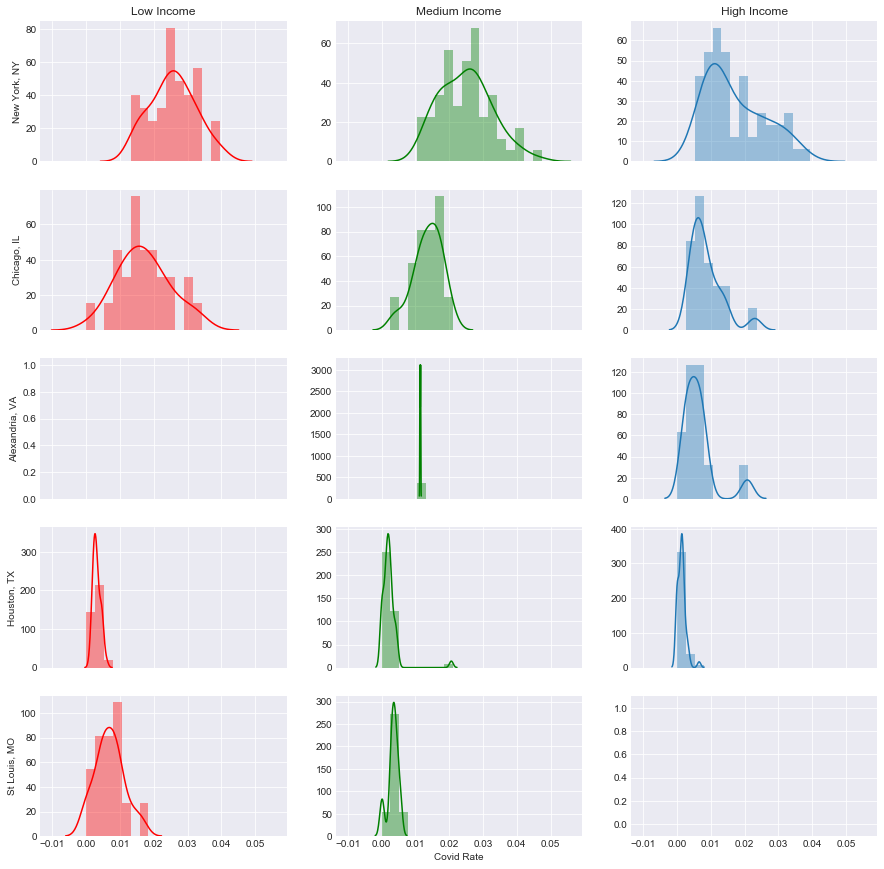

In [9]:
f, axes = plt.subplots(5, 3, figsize=(15, 15), sharex=True)
bins = np.linspace(0, 0.05,20)

sns.distplot(data[(data['city']=='NY') & (data['income strata']=='low')]['covid rate'], ax=axes[0][0],hist=True,bins=bins,color='red')
sns.distplot(data[(data['city']=='NY') & (data['income strata']=='medium')]['covid rate'], ax=axes[0][1],hist=True,bins=bins, color='green')
sns.distplot(data[(data['city']=='NY') & (data['income strata']=='high')]['covid rate'], ax=axes[0][2],hist=True,bins=bins)
axes[0][0].set_ylabel('New York, NY')

sns.distplot(data[(data['city']=='Chicago') & (data['income strata']=='low')]['covid rate'], ax=axes[1][0],hist=True,bins=bins,color='red')
sns.distplot(data[(data['city']=='Chicago') & (data['income strata']=='medium')]['covid rate'], ax=axes[1][1],hist=True,bins=bins,color='green')
sns.distplot(data[(data['city']=='Chicago') & (data['income strata']=='high')]['covid rate'], ax=axes[1][2],hist=True,bins=bins)
axes[1][0].set_ylabel('Chicago, IL')

sns.distplot(data[(data['city']=='Alexandria') & (data['income strata']=='low')]['covid rate'], ax=axes[2][0],hist=True,bins=bins, color='red')
sns.distplot(data[(data['city']=='Alexandria') & (data['income strata']=='medium')]['covid rate'], ax=axes[2][1],hist=True,bins=bins, color='green')
sns.distplot(data[(data['city']=='Alexandria') & (data['income strata']=='high')]['covid rate'], ax=axes[2][2],hist=True,bins=bins)
axes[2][0].set_ylabel('Alexandria, VA')

sns.distplot(data[(data['city']=='Houston') & (data['income strata']=='low')]['covid rate'], ax=axes[3][0],hist=True,bins=bins, color='red')
sns.distplot(data[(data['city']=='Houston') & (data['income strata']=='medium')]['covid rate'], ax=axes[3][1],hist=True,bins=bins, color='green')
sns.distplot(data[(data['city']=='Houston') & (data['income strata']=='high')]['covid rate'], ax=axes[3][2],hist=True,bins=bins)
axes[3][0].set_ylabel('Houston, TX')

sns.distplot(data[(data['city']=='St Louis') & (data['income strata']=='low')]['covid rate'], ax=axes[4][0],hist=True,bins=bins, color='red')
sns.distplot(data[(data['city']=='St Louis') & (data['income strata']=='medium')]['covid rate'], ax=axes[4][1],hist=True,bins=bins,color='green')
sns.distplot(data[(data['city']=='St Louis') & (data['income strata']=='high')]['covid rate'], ax=axes[4][2],hist=True,bins=bins)
axes[4][0].set_ylabel('St Louis, MO')


for i in range(5):
    for j in range(3):
        axes[i][j].set_xlabel('')
        

axes[4][1].set_xlabel('Covid Rate')
axes[0][0].set_title('Low Income')
axes[0][1].set_title('Medium Income')
axes[0][2].set_title('High Income')

plt.savefig(os.path.join(figures_dir, 'histogram_subplots_income'),dpi=300)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)


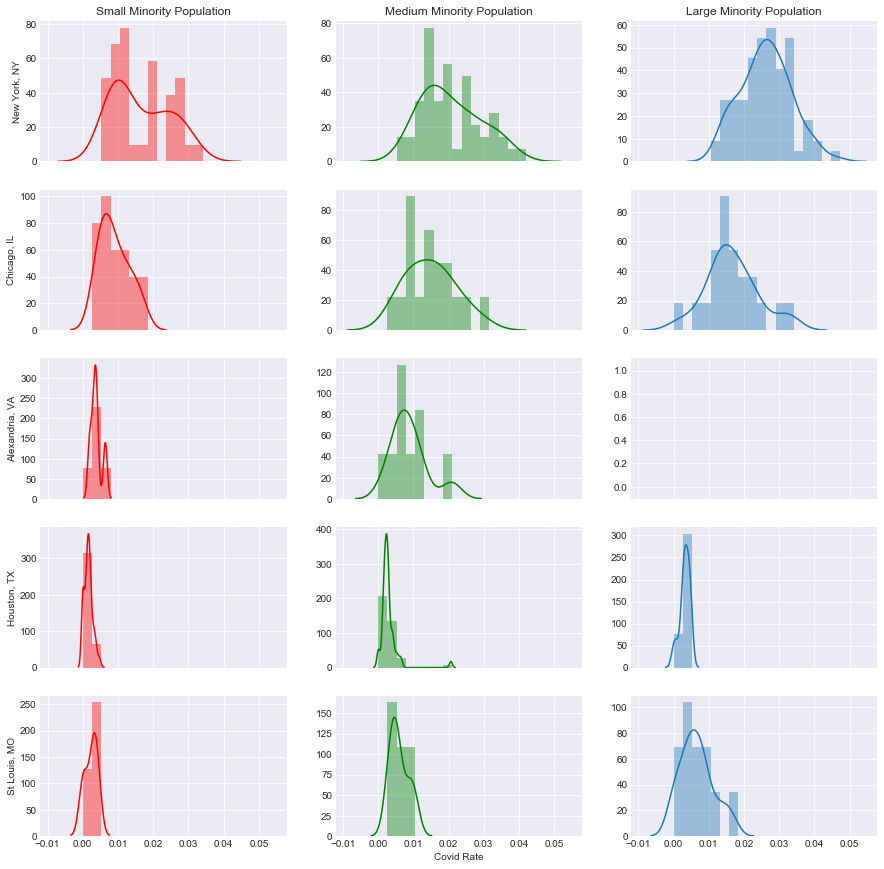

In [10]:
f, axes = plt.subplots(5, 3, figsize=(15, 15), sharex=True)
bins = np.linspace(0, 0.05,20)

sns.distplot(data[(data['city']=='NY') & (data['minority strata']=='low')]['covid rate'], ax=axes[0][0],hist=True,bins=bins,color='red')
sns.distplot(data[(data['city']=='NY') & (data['minority strata']=='medium')]['covid rate'], ax=axes[0][1],hist=True,bins=bins, color='green')
sns.distplot(data[(data['city']=='NY') & (data['minority strata']=='high')]['covid rate'], ax=axes[0][2],hist=True,bins=bins)
axes[0][0].set_ylabel('New York, NY')

sns.distplot(data[(data['city']=='Chicago') & (data['minority strata']=='low')]['covid rate'], ax=axes[1][0],hist=True,bins=bins,color='red')
sns.distplot(data[(data['city']=='Chicago') & (data['minority strata']=='medium')]['covid rate'], ax=axes[1][1],hist=True,bins=bins,color='green')
sns.distplot(data[(data['city']=='Chicago') & (data['minority strata']=='high')]['covid rate'], ax=axes[1][2],hist=True,bins=bins)
axes[1][0].set_ylabel('Chicago, IL')

sns.distplot(data[(data['city']=='Alexandria') & (data['minority strata']=='low')]['covid rate'], ax=axes[2][0],hist=True,bins=bins, color='red')
sns.distplot(data[(data['city']=='Alexandria') & (data['minority strata']=='medium')]['covid rate'], ax=axes[2][1],hist=True,bins=bins, color='green')
sns.distplot(data[(data['city']=='Alexandria') & (data['minority strata']=='high')]['covid rate'], ax=axes[2][2],hist=True,bins=bins)
axes[2][0].set_ylabel('Alexandria, VA')

sns.distplot(data[(data['city']=='Houston') & (data['minority strata']=='low')]['covid rate'], ax=axes[3][0],hist=True,bins=bins, color='red')
sns.distplot(data[(data['city']=='Houston') & (data['minority strata']=='medium')]['covid rate'], ax=axes[3][1],hist=True,bins=bins, color='green')
sns.distplot(data[(data['city']=='Houston') & (data['minority strata']=='high')]['covid rate'], ax=axes[3][2],hist=True,bins=bins)
axes[3][0].set_ylabel('Houston, TX')

sns.distplot(data[(data['city']=='St Louis') & (data['minority strata']=='low')]['covid rate'], ax=axes[4][0],hist=True,bins=bins, color='red')
sns.distplot(data[(data['city']=='St Louis') & (data['minority strata']=='medium')]['covid rate'], ax=axes[4][1],hist=True,bins=bins,color='green')
sns.distplot(data[(data['city']=='St Louis') & (data['minority strata']=='high')]['covid rate'], ax=axes[4][2],hist=True,bins=bins)
axes[4][0].set_ylabel('St Louis, MO')


for i in range(5):
    for j in range(3):
        axes[i][j].set_xlabel('')
        

axes[4][1].set_xlabel('Covid Rate')
axes[0][0].set_title('Small Minority Population')
axes[0][1].set_title('Medium Minority Population')
axes[0][2].set_title('Large Minority Population')

plt.savefig(os.path.join(figures_dir, 'histogram_subplots_minority'),dpi=300)

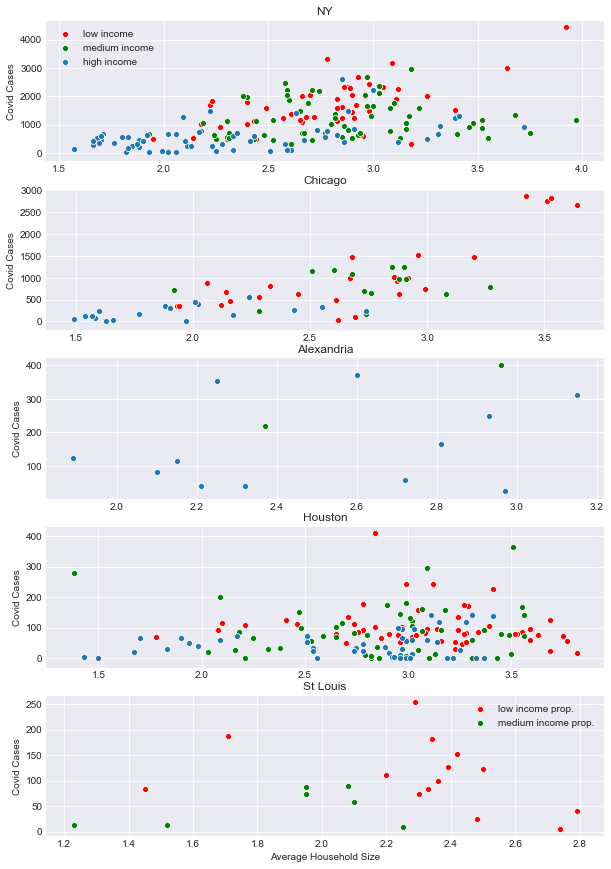

In [11]:
plt.figure(figsize=(10,15))
plt.subplot(511)
sns.scatterplot(data[(data['city']=='NY') & (data['income strata']=='low')]['avg household size'], \
         data[(data['city']=='NY') & (data['income strata']=='low')]['covid_cases'], color='red',label='low income')
sns.scatterplot(data[(data['city']=='NY') & (data['income strata']=='medium')]['avg household size'], \
         data[(data['city']=='NY') & (data['income strata']=='medium')]['covid_cases'], color='green',label='medium income')
sns.scatterplot(data[(data['city']=='NY') & (data['income strata']=='high')]['avg household size'], \
         data[(data['city']=='NY') & (data['income strata']=='high')]['covid_cases'], label='high income')
plt.legend()
plt.title('NY')
plt.xlabel(' ')
plt.ylabel('Covid Cases')

plt.subplot(512)
sns.scatterplot(data[(data['city']=='Chicago') & (data['income strata']=='low')]['avg household size'], \
         data[(data['city']=='Chicago') & (data['income strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='Chicago') & (data['income strata']=='medium')]['avg household size'], \
         data[(data['city']=='Chicago') & (data['income strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='Chicago') & (data['income strata']=='high')]['avg household size'], \
         data[(data['city']=='Chicago') & (data['income strata']=='high')]['covid_cases'])
plt.title('Chicago')
plt.xlabel(' ')
plt.ylabel('Covid Cases')


plt.subplot(513)
sns.scatterplot(data[(data['city']=='Alexandria') & (data['income strata']=='low')]['avg household size'], \
         data[(data['city']=='Alexandria') & (data['income strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='Alexandria') & (data['income strata']=='medium')]['avg household size'], \
         data[(data['city']=='Alexandria') & (data['income strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='Alexandria') & (data['income strata']=='high')]['avg household size'], \
         data[(data['city']=='Alexandria') & (data['income strata']=='high')]['covid_cases'])
plt.title('Alexandria')
plt.xlabel(' ')
plt.ylabel('Covid Cases')


plt.subplot(514)
sns.scatterplot(data[(data['city']=='Houston') & (data['income strata']=='low')]['avg household size'], \
         data[(data['city']=='Houston') & (data['income strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='Houston') & (data['income strata']=='medium')]['avg household size'], \
         data[(data['city']=='Houston') & (data['income strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='Houston') & (data['income strata']=='high')]['avg household size'], \
         data[(data['city']=='Houston') & (data['income strata']=='high')]['covid_cases'])
plt.title('Houston')
plt.xlabel(' ')
plt.ylabel('Covid Cases')


plt.subplot(515)
sns.scatterplot(data[(data['city']=='St Louis') & (data['income strata']=='low')]['avg household size'], \
         data[(data['city']=='St Louis') & (data['income strata']=='low')]['covid_cases'], color='red',label='low income prop.')
sns.scatterplot(data[(data['city']=='St Louis') & (data['income strata']=='medium')]['avg household size'], \
         data[(data['city']=='St Louis') & (data['income strata']=='medium')]['covid_cases'], color='green', label='medium income prop.')
sns.scatterplot(data[(data['city']=='St Louis') & (data['income strata']=='high')]['avg household size'], \
         data[(data['city']=='St Louis') & (data['income strata']=='high')]['covid_cases'], label='high income prop.')
plt.title('St Louis')
plt.xlabel('Average Household Size')
plt.ylabel('Covid Cases')


plt.savefig(os.path.join(figures_dir, 'scatterplots_income'),dpi=300)

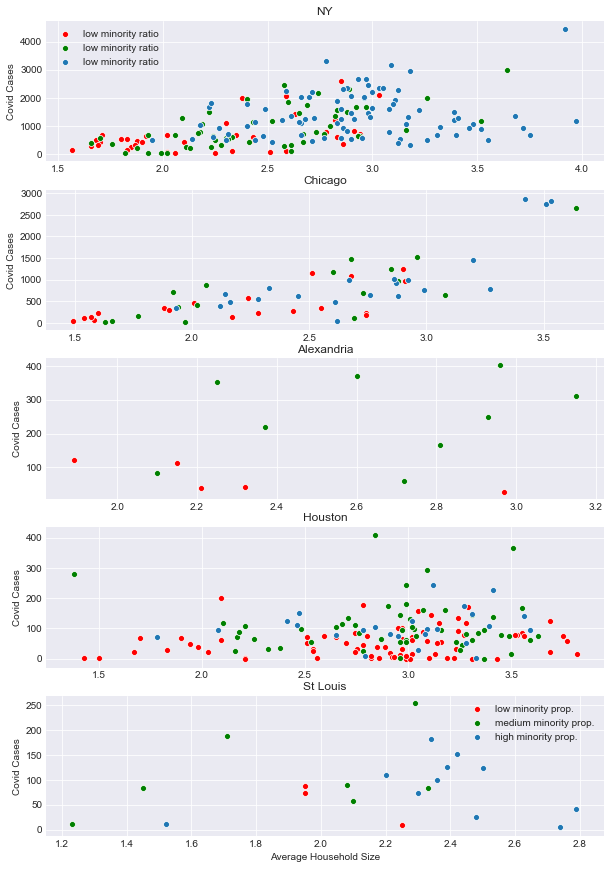

In [12]:
plt.figure(figsize=(10,15))
plt.subplot(511)
sns.scatterplot(data[(data['city']=='NY') & (data['minority strata']=='low')]['avg household size'], \
         data[(data['city']=='NY') & (data['minority strata']=='low')]['covid_cases'], color='red',label='low minority ratio')
sns.scatterplot(data[(data['city']=='NY') & (data['minority strata']=='medium')]['avg household size'], \
         data[(data['city']=='NY') & (data['minority strata']=='medium')]['covid_cases'], color='green',label='low minority ratio')
sns.scatterplot(data[(data['city']=='NY') & (data['minority strata']=='high')]['avg household size'], \
         data[(data['city']=='NY') & (data['minority strata']=='high')]['covid_cases'],label='low minority ratio')
plt.title('NY')
plt.xlabel(' ')
plt.legend()
plt.ylabel('Covid Cases')

plt.subplot(512)
sns.scatterplot(data[(data['city']=='Chicago') & (data['minority strata']=='low')]['avg household size'], \
         data[(data['city']=='Chicago') & (data['minority strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='Chicago') & (data['minority strata']=='medium')]['avg household size'], \
         data[(data['city']=='Chicago') & (data['minority strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='Chicago') & (data['minority strata']=='high')]['avg household size'], \
         data[(data['city']=='Chicago') & (data['minority strata']=='high')]['covid_cases'])
plt.title('Chicago')
plt.xlabel(' ')
plt.ylabel('Covid Cases')


plt.subplot(513)
sns.scatterplot(data[(data['city']=='Alexandria') & (data['minority strata']=='low')]['avg household size'], \
         data[(data['city']=='Alexandria') & (data['minority strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='Alexandria') & (data['minority strata']=='medium')]['avg household size'], \
         data[(data['city']=='Alexandria') & (data['minority strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='Alexandria') & (data['minority strata']=='high')]['avg household size'], \
         data[(data['city']=='Alexandria') & (data['minority strata']=='high')]['covid_cases'])
plt.title('Alexandria')
plt.xlabel(' ')
plt.ylabel('Covid Cases')


plt.subplot(514)
sns.scatterplot(data[(data['city']=='Houston') & (data['minority strata']=='low')]['avg household size'], \
         data[(data['city']=='Houston') & (data['minority strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='Houston') & (data['minority strata']=='medium')]['avg household size'], \
         data[(data['city']=='Houston') & (data['minority strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='Houston') & (data['minority strata']=='high')]['avg household size'], \
         data[(data['city']=='Houston') & (data['minority strata']=='high')]['covid_cases'])
plt.title('Houston')
plt.xlabel(' ')
plt.ylabel('Covid Cases')


plt.subplot(515)
sns.scatterplot(data[(data['city']=='St Louis') & (data['minority strata']=='low')]['avg household size'], \
         data[(data['city']=='St Louis') & (data['minority strata']=='low')]['covid_cases'], color='red',label='low minority prop.')
sns.scatterplot(data[(data['city']=='St Louis') & (data['minority strata']=='medium')]['avg household size'], \
         data[(data['city']=='St Louis') & (data['minority strata']=='medium')]['covid_cases'], color='green', label='medium minority prop.')
sns.scatterplot(data[(data['city']=='St Louis') & (data['minority strata']=='high')]['avg household size'], \
         data[(data['city']=='St Louis') & (data['minority strata']=='high')]['covid_cases'], label='high minority prop.')
plt.title('St Louis')
plt.xlabel('Average Household Size')
plt.ylabel('Covid Cases')


plt.savefig(os.path.join(figures_dir, 'scatterplots_minority'),dpi=300)

In [13]:
city_list = list(data['city'].unique())
city_lookup = dict(zip(city_list, range(len(city_list))))
data['city number'] = data['city'].replace(city_lookup).values

In [14]:
income_strata_list = ['low','medium','high']
income_strata_lookup = dict(zip(income_strata_list, range(len(income_strata_list))))
data['income strata number'] = data['income strata'].replace(income_strata_lookup).values

In [15]:
minority_strata_list = ['low','medium','high']
minority_strata_lookup = dict(zip(minority_strata_list, range(len(minority_strata_list))))
data['minority strata number'] = data['minority strata'].replace(minority_strata_lookup).values

In [16]:
data.keys()

Index(['zipcode', 'covid_cases', 'avg household size', 'proportion minority',
       'population', 'covid rate', 'median income', 'city', 'income strata',
       'minority strata', 'city number', 'income strata number',
       'minority strata number'],
      dtype='object')

In [17]:
data['log_population'] = np.log(data['population'])

In [19]:
with pm.Model() as model_low_income:
    
    curr_data = data[data['income strata']=='low']
    curr_city_list = list(curr_data['city'].unique())
    city_lookup_low = dict(zip(curr_city_list, range(len(curr_city_list))))
    curr_data['city number'] = curr_data['city'].replace(city_lookup_low).values
    
    # define priors, weakly informative 
    mu_b0 = pm.Normal('mu_b0', 0, 3)#, shape= (1,len(income_strata_list)))
    b0 = pm.Normal('beta0', mu_b0, sigma=3, shape=(1,len(curr_city_list)))#,len(income_strata_list)))
    b1 = pm.Normal('beta1', 0, sigma=3, shape=1)#len(income_strata_list))
    
    theta = (b0[0,curr_data['city number']] +  b1*curr_data['avg household size'].values)
    
    mu = pm.Deterministic('mu', theta + curr_data['log_population'].values)
    
    ## Define Poisson likelihood
    y = pm.Poisson('y', mu=tt.exp(mu), observed=curr_data['covid_cases'].values)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, beta0, mu_b0]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:33<00:00, 596.68draws/s]
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/opt/anacon

In [ ]:
with pm.Model() as model_medium_income:
    
    curr_data = data[data['income strata']=='medium']
    curr_city_list = list(curr_data['city'].unique())
    city_lookup_med = dict(zip(curr_city_list, range(len(curr_city_list))))
    curr_data['city number'] = curr_data['city'].replace(city_lookup_med).values
    
    mu_b0 = pm.Normal('mu_b0', 0, 3)#, shape= (1,len(income_strata_list)))
    b0 = pm.Normal('beta0', mu_b0, sigma=3, shape=len(curr_city_list))#,len(income_strata_list)))
    b1 = pm.Normal('beta1', 0, sigma=3, shape=1)#len(income_strata_list))
    
    theta = (b0[curr_data['city number']] +  b1*curr_data['avg household size'].values)
    
    mu = pm.Deterministic('mu', theta + curr_data['log_population'].values)
    
    
    ## Define Poisson likelihood
    y = pm.Poisson('y', mu=np.exp(mu), observed=curr_data['covid_cases'].values)
    

In [ ]:
with pm.Model() as model_high_income:
    
    curr_data = data[data['income strata']=='high']
    curr_city_list = list(curr_data['city'].unique())
    city_lookup_high = dict(zip(curr_city_list, range(len(curr_city_list))))
    curr_data['city number'] = curr_data['city'].replace(city_lookup_high).values
    
    # define priors, weakly informative 
    mu_b0 = pm.Normal('mu_b0', 0, 3)#, shape= (1,len(income_strata_list)))
    b0 = pm.Normal('beta0', mu_b0, sigma=3, shape=len(curr_city_list))#,len(income_strata_list)))
    b1 = pm.Normal('beta1', 0, sigma=3, shape=1)#len(income_strata_list))
    
    theta = (b0[curr_data['city number']] +  b1*curr_data['avg household size'].values)
    mu = pm.Deterministic('mu', theta + curr_data['log_population'].values)
    
    ## Define Poisson likelihood
    y = pm.Poisson('y', mu=np.exp(mu), observed=curr_data['covid_cases'].values)
    

In [ ]:
with model_low_income:
    trc_model_low_income = pm.sample(2000, tune=3000, cores=4)

In [22]:
with open('./data/traces/trace_low_income.pkl', 'wb') as f:
    pickle.dump(trc_model_low_income, f)

In [30]:
with model_medium_income:
    trc_model_medium_income = pm.sample(2000, tune=3000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, beta0, mu_b0]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:32<00:00, 615.83draws/s]
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__g

In [31]:
with open('./data/traces/trace_medium_income.pkl', 'wb') as f:
    pickle.dump(trc_model_medium_income, f)

In [42]:
with model_high_income:
    trc_model_high_income = pm.sample(2000, tune=3000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, beta0, mu_b0]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:27<00:00, 736.96draws/s] 
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [43]:
with open('./data/traces/trace_high_income.pkl', 'wb') as f:
    pickle.dump(trc_model_high_income, f)

In [44]:
sum_low = pm.summary(trc_model_low_income)
city_low = list(city_lookup_low.keys())
#sum_low.index = ['mu', 'beta0_' + city_low[0], 'beta0_' + city_low[1],\
#                 'beta0_' + city_low[2],\
#                'beta0_' + city_low[3],'beta1']
sum_low[:-len(data[data['income strata']=='low'])]

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_b0,-4.595,1.342,-7.041,-2.016,0.020,0.015,4332.0,4229.0,4316.0,4616.0,1.0
"beta0[0,0]",-4.771,0.020,-4.808,-4.733,0.000,0.000,2103.0,2103.0,2102.0,2915.0,1.0
"beta0[0,1]",-5.064,0.021,-5.104,-5.025,0.000,0.000,2155.0,2155.0,2155.0,2922.0,1.0
"beta0[0,2]",-6.938,0.025,-6.985,-6.891,0.001,0.000,2409.0,2409.0,2409.0,3669.0,1.0
"beta0[0,3]",-6.085,0.030,-6.140,-6.027,0.000,0.000,3884.0,3884.0,3898.0,4816.0,1.0
beta1[0],0.382,0.007,0.369,0.395,0.000,0.000,2087.0,2087.0,2089.0,2836.0,1.0


In [46]:
sum_med = pm.summary(trc_model_medium_income)
city_med = list(city_lookup_med.keys())
#sum_med.index = ['mu', 'beta0_' + city_med[0], 'beta0_' + city_med[1],\
#                 'beta0_' + city_med[2],\
#                'beta0_' + city_med[3],\
#                'beta0_' + city_med[4],'beta1']
sum_med[:-len(data[data['income strata']=='medium'])]

/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_b0,-4.678,1.235,-7.007,-2.382,0.016,0.011,6171.0,5927.0,6165.0,5450.0,1.0
beta0[0],-4.444,0.024,-4.489,-4.398,0.001,0.000,2339.0,2339.0,2338.0,3251.0,1.0
beta0[1],-4.980,0.025,-5.027,-4.934,0.001,0.000,2411.0,2411.0,2411.0,3309.0,1.0
beta0[2],-5.187,0.046,-5.275,-5.102,0.001,0.001,3919.0,3919.0,3923.0,4767.0,1.0
beta0[3],-6.823,0.029,-6.877,-6.767,0.001,0.000,2740.0,2740.0,2742.0,3785.0,1.0
beta0[4],-6.578,0.057,-6.681,-6.470,0.001,0.001,5301.0,5301.0,5298.0,5096.0,1.0
beta1[0],0.258,0.008,0.242,0.273,0.000,0.000,2341.0,2341.0,2344.0,3232.0,1.0


In [47]:
sum_high = pm.summary(trc_model_high_income)
city_high = list(city_lookup_high.keys())
#sum_high.index = ['mu', 'beta0_' + city_high[0], 'beta0_' + city_high[1],\
#                 'beta0_' + city_high[2],\
#                'beta0_' + city_high[3],'beta1']
sum_high[:-len(data[data['income strata']=='high'])]

/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_b0,-5.399,1.339,-7.994,-2.973,0.019,0.013,5135.0,5135.0,5137.0,4017.0,1.0
beta0[0],-5.543,0.023,-5.587,-5.501,0.001,0.000,2034.0,2034.0,2036.0,2979.0,1.0
beta0[1],-6.153,0.024,-6.198,-6.107,0.000,0.000,2371.0,2370.0,2369.0,3860.0,1.0
beta0[2],-6.625,0.033,-6.689,-6.567,0.001,0.000,2779.0,2778.0,2774.0,4033.0,1.0
beta0[3],-8.612,0.034,-8.672,-8.543,0.001,0.000,2523.0,2522.0,2525.0,3705.0,1.0
beta1[0],0.610,0.009,0.592,0.626,0.000,0.000,2025.0,2023.0,2025.0,2864.0,1.0


/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.p

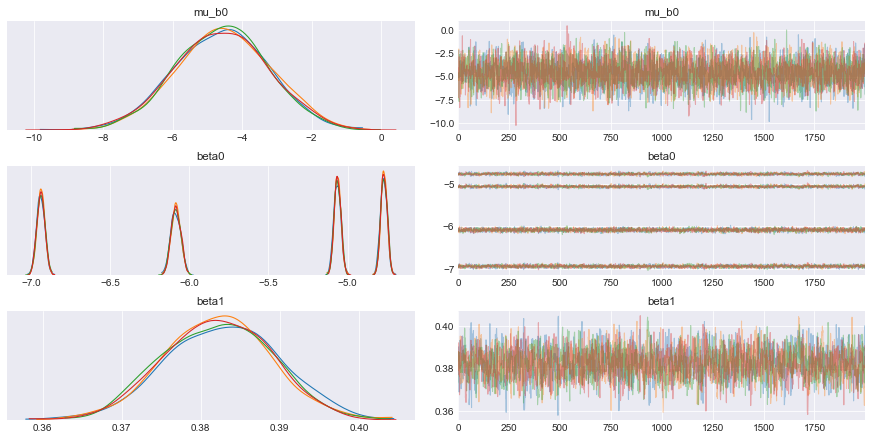

In [50]:
fig = pm.traceplot(trc_model_low_income, var_names = ['mu_b0','beta0','beta1'])
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.p

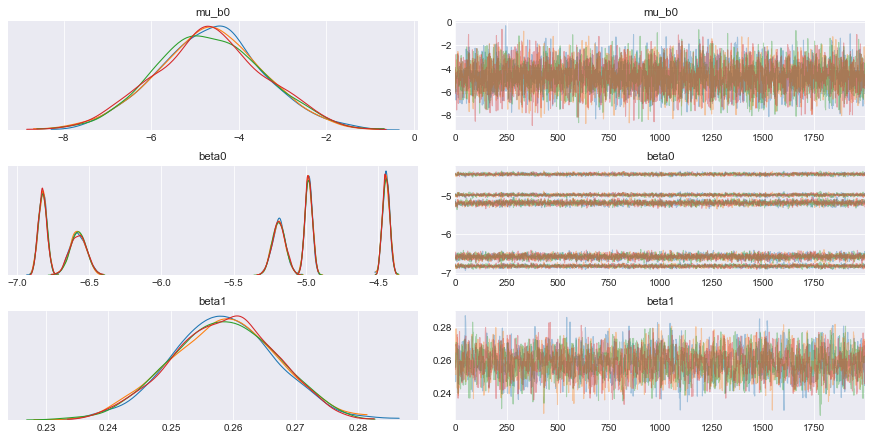

In [51]:
fig = pm.traceplot(trc_model_medium_income, var_names = ['mu_b0','beta0','beta1'])
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.p

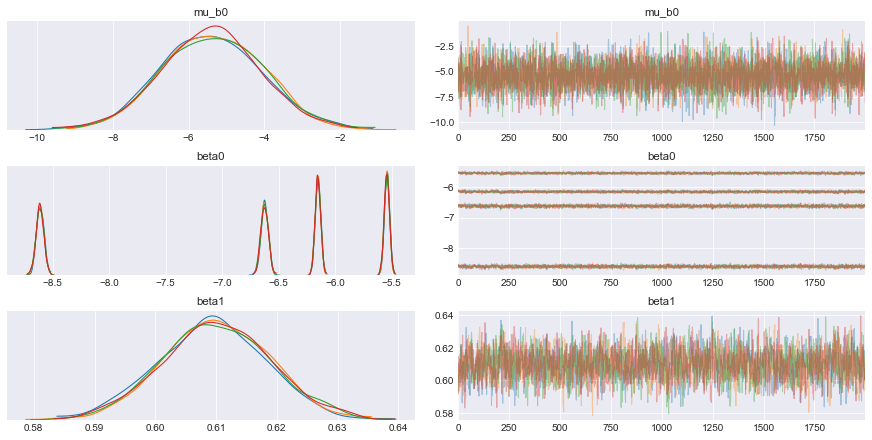

In [52]:
fig = pm.traceplot(trc_model_high_income, var_names = ['mu_b0','beta0','beta1'])
plt.show()

In [975]:
ppc_low_income = pm.sample_posterior_predictive(trc_model_low_income, samples=1000, model=model_low_income)
ppc_medium_income = pm.sample_posterior_predictive(trc_model_medium_income, samples=1000, model=model_medium_income)
ppc_high_income = pm.sample_posterior_predictive(trc_model_high_income, samples=1000, model=model_high_income)


/opt/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
  0%|          | 0/1000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
100%|██████████| 1000/1000 [00:00<00:00, 1602.09it/s]


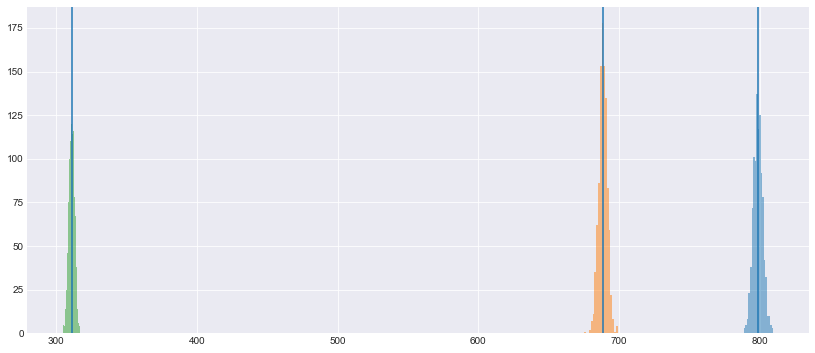

In [976]:
plt.hist([n.mean() for n in ppc_low_income['y']], bins=19, alpha=0.5, label='low income')
plt.axvline(data[data['income strata']=='low']['covid_cases'].mean())


plt.hist([n.mean() for n in ppc_medium_income['y']], bins=19, alpha=0.5, label='medium income')
plt.axvline(data[data['income strata']=='medium']['covid_cases'].mean())


plt.hist([n.mean() for n in ppc_high_income['y']], bins=19, alpha=0.5, label='high income')
plt.axvline(data[data['income strata']=='high']['covid_cases'].mean())
plt.show()

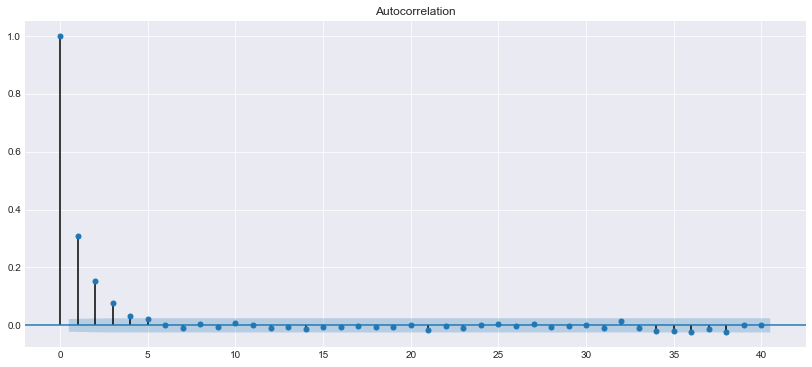

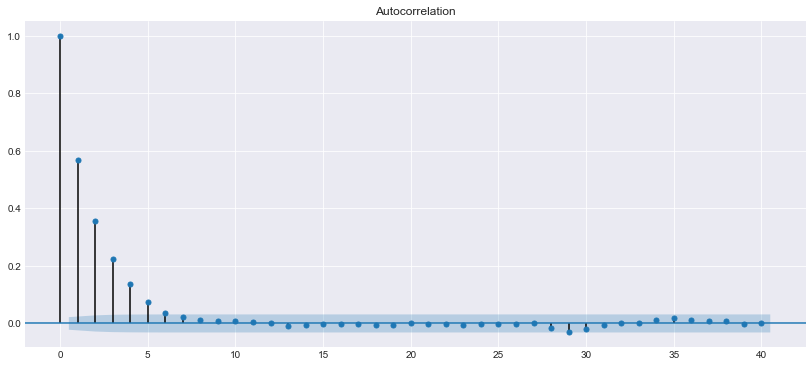

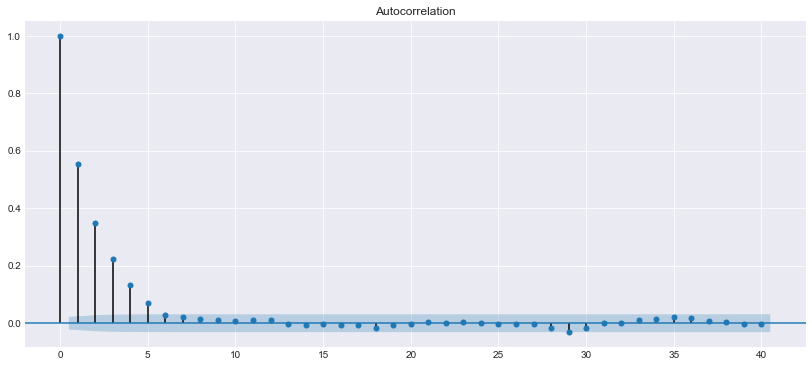

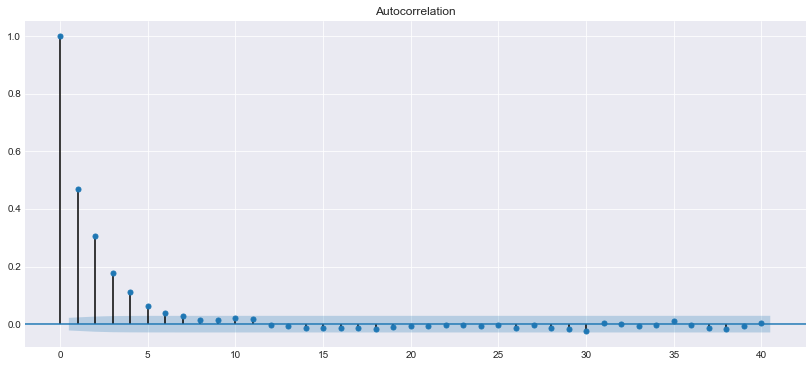

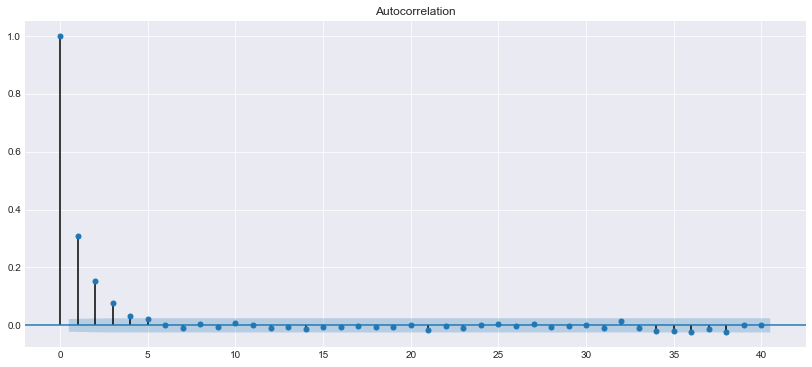

In [1034]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(trc_model_low_income['beta0'][:,0,0])
plot_acf(trc_model_low_income['beta0'][:,0,1])
plot_acf(trc_model_low_income['beta0'][:,0,2])
plot_acf(trc_model_low_income['beta0'][:,0,3])

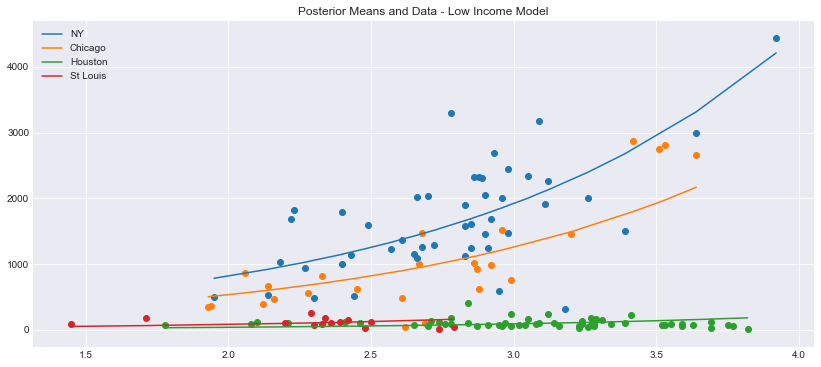

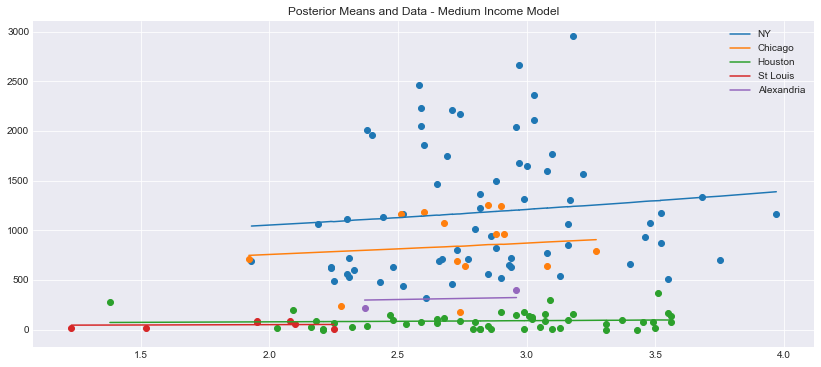

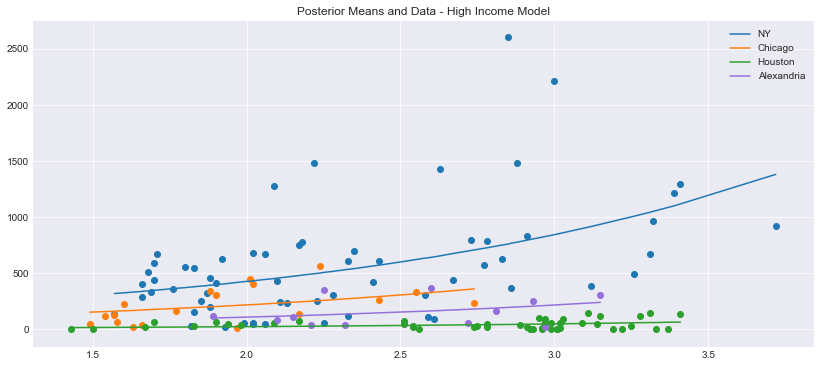

In [1162]:
low_data = data[data['income strata']=='low']

NY_data = low_data[low_data['city'] == 'NY']
ppc_NY = ppc_low_income['y'][:,low_data['city'] == 'NY']
sorted_hh, sorted_ppc_NY_mean = zip(*sorted(zip(NY_data['avg household size'], ppc_NY.mean(axis=0)), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_NY_mean, label='NY')
plt.scatter(NY_data['avg household size'], NY_data['covid_cases'])

Chicago_data = low_data[low_data['city'] == 'Chicago']
ppc_Chicago = ppc_low_income['y'][:,low_data['city'] == 'Chicago']
sorted_hh, sorted_ppc_Chicago_mean = zip(*sorted(zip(Chicago_data['avg household size'], ppc_Chicago.mean(axis=0)), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Chicago_mean, label='Chicago')
plt.scatter(Chicago_data['avg household size'], Chicago_data['covid_cases'])

Houston_data = low_data[low_data['city'] == 'Houston']
ppc_Houston = ppc_low_income['y'][:,low_data['city'] == 'Houston']
sorted_hh, sorted_ppc_Houston_mean = zip(*sorted(zip(Houston_data['avg household size'], ppc_Houston.mean(axis=0)), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Houston_mean, label='Houston')
plt.scatter(Houston_data['avg household size'], Houston_data['covid_cases'])

St_louis_data = low_data[low_data['city'] == 'St Louis']
ppc_St_louis = ppc_low_income['y'][:,low_data['city'] == 'St Louis']
sorted_hh, sorted_ppc_St_louis_mean = zip(*sorted(zip(St_louis_data['avg household size'], ppc_St_louis.mean(axis=0)), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_St_louis_mean,  label='St Louis')
plt.scatter(St_louis_data['avg household size'], St_louis_data['covid_cases'])
plt.legend()
plt.title('Posterior Means and Data - Low Income Model')
plt.show()


medium_data = data[data['income strata']=='medium']

NY_data = medium_data[medium_data['city'] == 'NY']
ppc_NY = ppc_medium_income['y'][:,medium_data['city'] == 'NY']
sorted_hh, sorted_ppc_NY_mean = zip(*sorted(zip(NY_data['avg household size'], ppc_NY.mean(axis=0)), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_NY_mean, label='NY')
plt.scatter(NY_data['avg household size'], NY_data['covid_cases'])

Chicago_data = medium_data[medium_data['city'] == 'Chicago']
ppc_Chicago = ppc_medium_income['y'][:,medium_data['city'] == 'Chicago']
sorted_hh, sorted_ppc_Chicago_mean = zip(*sorted(zip(Chicago_data['avg household size'], ppc_Chicago.mean(axis=0)), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Chicago_mean, label='Chicago')
plt.scatter(Chicago_data['avg household size'], Chicago_data['covid_cases'])

Houston_data = medium_data[medium_data['city'] == 'Houston']
ppc_Houston = ppc_medium_income['y'][:,medium_data['city'] == 'Houston']
sorted_hh, sorted_ppc_Houston_mean = zip(*sorted(zip(Houston_data['avg household size'], ppc_Houston.mean(axis=0)), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Houston_mean, label='Houston')
plt.scatter(Houston_data['avg household size'], Houston_data['covid_cases'])

St_louis_data = medium_data[medium_data['city'] == 'St Louis']
ppc_St_louis = ppc_medium_income['y'][:,medium_data['city'] == 'St Louis']
sorted_hh, sorted_ppc_St_louis_mean = zip(*sorted(zip(St_louis_data['avg household size'], ppc_St_louis.mean(axis=0)), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_St_louis_mean,  label='St Louis')
plt.scatter(St_louis_data['avg household size'], St_louis_data['covid_cases'])

Alexandria_data = medium_data[medium_data['city'] == 'Alexandria']
ppc_Alexandria = ppc_medium_income['y'][:,medium_data['city'] == 'Alexandria']
sorted_hh, sorted_ppc_Alexandria_mean = zip(*sorted(zip(Alexandria_data['avg household size'], ppc_Alexandria.mean(axis=0)), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Alexandria_mean, label='Alexandria')
plt.scatter(Alexandria_data['avg household size'], Alexandria_data['covid_cases'])
plt.legend()
plt.title('Posterior Means and Data - Medium Income Model')
plt.show()

high_data = data[data['income strata']=='high']

NY_data = high_data[high_data['city'] == 'NY']
ppc_NY = ppc_high_income['y'][:,high_data['city'] == 'NY']
sorted_hh, sorted_ppc_NY_mean = zip(*sorted(zip(NY_data['avg household size'], ppc_NY.mean(axis=0)), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_NY_mean, label='NY')
plt.scatter(NY_data['avg household size'], NY_data['covid_cases'])

Chicago_data = high_data[high_data['city'] == 'Chicago']
ppc_Chicago = ppc_high_income['y'][:,high_data['city'] == 'Chicago']
sorted_hh, sorted_ppc_Chicago_mean = zip(*sorted(zip(Chicago_data['avg household size'], ppc_Chicago.mean(axis=0)), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Chicago_mean, label='Chicago')
plt.scatter(Chicago_data['avg household size'], Chicago_data['covid_cases'])

Houston_data = high_data[high_data['city'] == 'Houston']
ppc_Houston = ppc_high_income['y'][:,high_data['city'] == 'Houston']
sorted_hh, sorted_ppc_Houston_mean = zip(*sorted(zip(Houston_data['avg household size'], ppc_Houston.mean(axis=0)), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Houston_mean, label='Houston')
plt.scatter(Houston_data['avg household size'], Houston_data['covid_cases'])

Alexandria_data = high_data[high_data['city'] == 'Alexandria']
ppc_Alexandria = ppc_high_income['y'][:,high_data['city'] == 'Alexandria']
sorted_hh, sorted_ppc_Alexandria_mean = zip(*sorted(zip(Alexandria_data['avg household size'], ppc_Alexandria.mean(axis=0)), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Alexandria_mean, label='Alexandria',color='mediumpurple')
plt.scatter(Alexandria_data['avg household size'], Alexandria_data['covid_cases'],color='mediumpurple')
plt.legend()
plt.title('Posterior Means and Data - High Income Model')
plt.show()

In [1163]:
data

,zipcode,covid_cases,avg household size,proportion minority,covid rate,median income,city,income strata,minority strata,city number,income strata number,minority strata number,avg_household_size,income_strata,NY,Chicago,Alexandria,Houston,St Louis,St_Louis
0,10001,361.0,1.76,0.371,0.015748,88526.0,NY,high,medium,0,2,1,1.76,high,True,False,False,False,False,False
1,10002,1035.0,2.18,0.678,0.013801,35859.0,NY,low,high,0,0,2,2.18,low,True,False,False,False,False,False
2,10003,445.0,1.70,0.241,0.008138,112131.0,NY,high,low,0,2,0,1.70,high,True,False,False,False,False,False
3,10004,31.0,1.82,0.372,0.010238,157645.0,NY,high,medium,0,2,1,1.82,high,True,False,False,False,False,False
4,10005,61.0,2.02,0.266,0.006907,173333.0,NY,high,low,0,2,0,2.02,high,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,63123,9.0,2.25,0.096,0.000176,57215.0,St Louis,medium,low,4,1,0,2.25,medium,False,False,False,False,True,True
17,63136,25.0,2.48,0.929,0.000551,32224.0,St Louis,low,high,4,0,2,2.48,low,False,False,False,False,True,True
18,63137,5.0,2.74,0.809,0.000250,40462.0,St Louis,low,high,4,0,2,2.74,low,False,False,False,False,True,True
19,63139,88.0,1.95,0.185,0.004012,54362.0,St Louis,medium,low,4,1,0,1.95,medium,False,False,False,False,True,True


In [1213]:
import statsmodels.api as sm

data_low_income = data[data['income strata'] == 'low']
poisson_model_low_income = sm.GLM(data_low_income[['covid_cases']].values,\
                                  sm.add_constant(data_low_income['avg household size']).values, \
                                  family=sm.families.Poisson())

poisson_model_low_income.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  141
Model:                            GLM   Df Residuals:                      139
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67980.
Date:                Wed, 01 Jul 2020   Deviance:                   1.3488e+05
Time:                        18:25:38   Pearson chi2:                 1.35e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6338      0.018    305.397      0.000       5.598       5.670
x1             0.3647      0.006     58.469      0.000       0.352       0.377
==============================================================================
"""

In [1214]:
data_medium_income = data[data['income strata'] == 'medium']
poisson_model_medium_income = sm.GLM(data_medium_income[['covid_cases']],\
                                  sm.add_constant(data_medium_income['avg household size']), \
                                  family=sm.families.Poisson())
poisson_model_medium_income.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            covid_cases   No. Observations:                  140
Model:                            GLM   Df Residuals:                      138
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -48476.
Date:                Wed, 01 Jul 2020   Deviance:                       95922.
Time:                        18:25:39   Pearson chi2:                 9.59e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.7540      0.020    289.597      0.000       5.715       5.793
avg household size     0.2777      0.007     40.259      0.000       0.264       0.291
======================================================================================
"""

In [1215]:
data_high_income = data[data['income strata'] == 'high']
poisson_model_high_income = sm.GLM(data_high_income[['covid_cases']],\
                                  sm.add_constant(data_high_income['avg household size']), \
                                  family=sm.families.Poisson())
poisson_model_high_income.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            covid_cases   No. Observations:                  141
Model:                            GLM   Df Residuals:                      139
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29492.
Date:                Wed, 01 Jul 2020   Deviance:                       58071.
Time:                        18:25:39   Pearson chi2:                 7.30e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.1215      0.022    235.369      0.000       5.079       5.164
avg household size     0.2505      0.008     29.582      0.000       0.234       0.267
======================================================================================
"""